# Seaborn 4: Bivariate Distributions

Understanding the distribution of a two features together provides scope for interesting observations. Seaborn provides the [jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot) function for this purpose.

In [1]:
# Load numpy and pandas for list and data set manipulation
import numpy as np
import pandas as pd

# Load matplotlib and seaborn for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set style for Seaborn
sns.set(color_codes=True)

In [3]:
world_data = pd.read_csv('world_data.csv')

## Jointplots
A basic scatterplot can be adorned with the two univariate histograms:

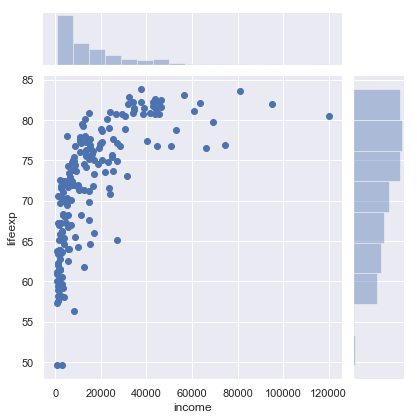

In [4]:
sns.jointplot(x="income", y="lifeexp", data=world_data);

## Hexbin Plots
A hexbin plot is effectively a bivariate histogram.  It counts the number of observations that fall in each hexagon and uses a colour intensity to indicate that value:

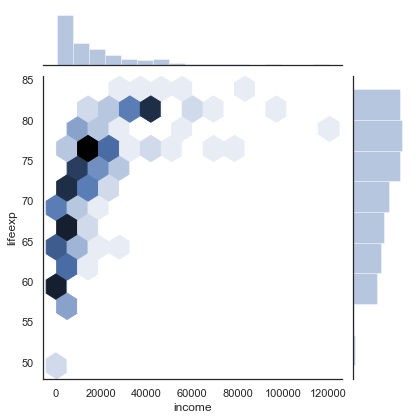

In [5]:
# Use a white background to prevent unwanted hexagonal artefacts
with sns.axes_style("white"):
    sns.jointplot(kind="hex", x="income", y="lifeexp", data=world_data)

## Contour plot
A contour plot shows a bivariate kernel density estimation:

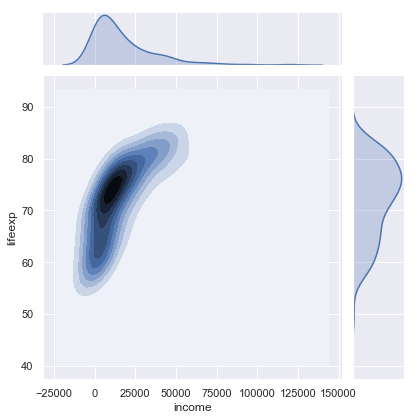

In [6]:
sns.jointplot(kind="kde", x="income", y="lifeexp", data=world_data)

## KDE plot
We can get a bit more control with the [kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) function.

Here we will add a rugplot to the two axes:

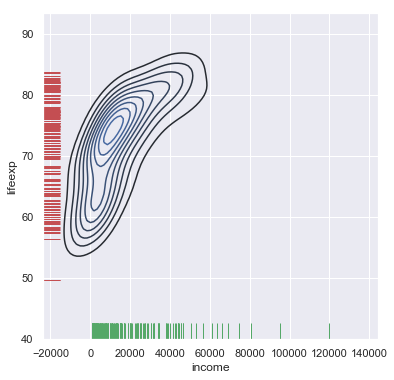

In [7]:
il = world_data[["country","region","income", "lifeexp"]].dropna()

f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(il.income, il.lifeexp, ax=ax)
sns.rugplot(il.income, color="g", ax=ax)
sns.rugplot(il.lifeexp, vertical=True, color="r", ax=ax);

Here, we will split out two regions:

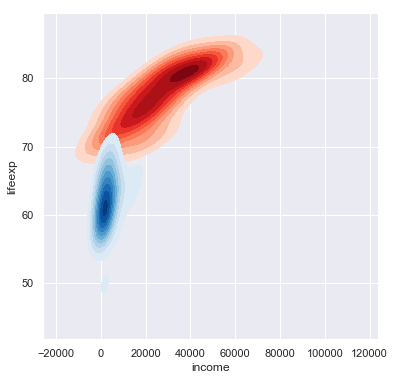

In [8]:
ilsa = il[il.region=="Sub-Saharan Africa"]
ile = il[il.region=="Europe & Central Asia"]

f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(ile.income, ile.lifeexp, shade=True, cmap="Reds", shade_lowest=False, ax=ax)
sns.kdeplot(ilsa.income, ilsa.lifeexp, shade=True, cmap="Blues", shade_lowest=False, ax=ax)
#sns.rugplot(il.income, color="g", ax=ax)
#sns.rugplot(il.lifeexp, vertical=True, ax=ax);

## Pairwise exploration
These plots, which use the [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) function, compare multiple pairs of features, giving a lot of information at once.

Here, scatter plots are shown for each pair.  All features appear across and down the page.  The diagonal shows the histogram of the feature, rather than a pointless scatterplot of the feature against itself.

C:\Users\llewe\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\llewe\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


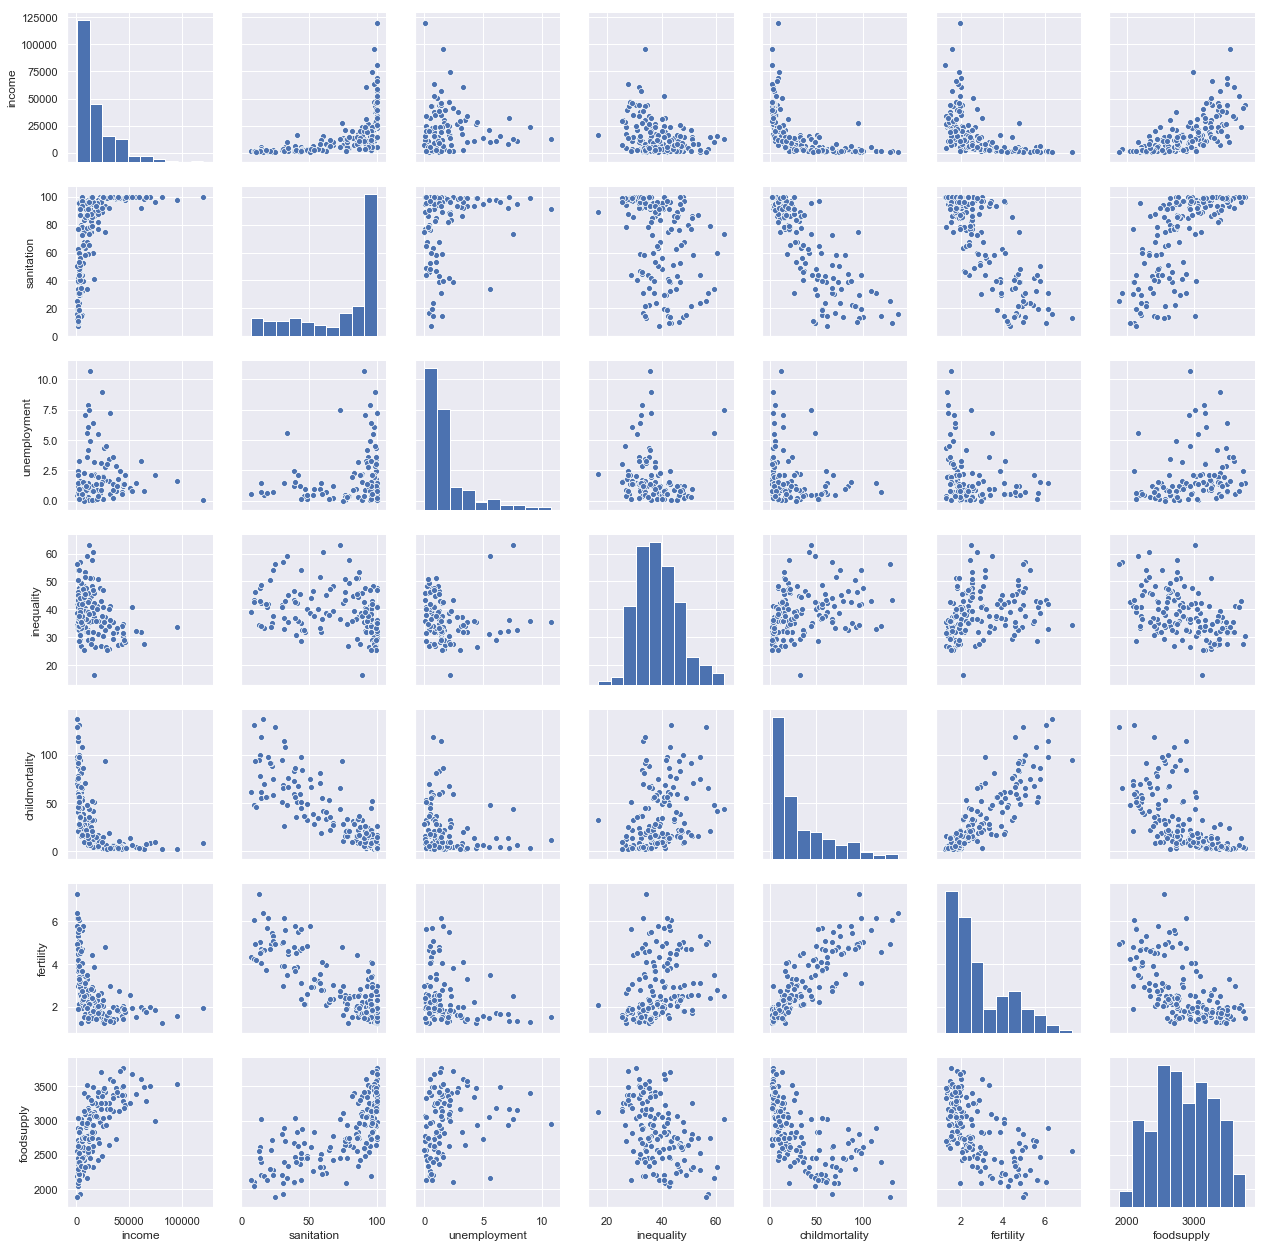

In [9]:
# Select a subset of the features
subset = world_data[['income', 'sanitation', 'unemployment', 'inequality', 
       'childmortality', 'fertility', 'foodsupply', 'lifeexpband']]

# Plot
sns.pairplot(subset)

We can repeat the above using a hue to split out the data by a categorical feature.  This really helps us understand which features are strong indicators of the category.  Note that the diagonals switch to KDEs.

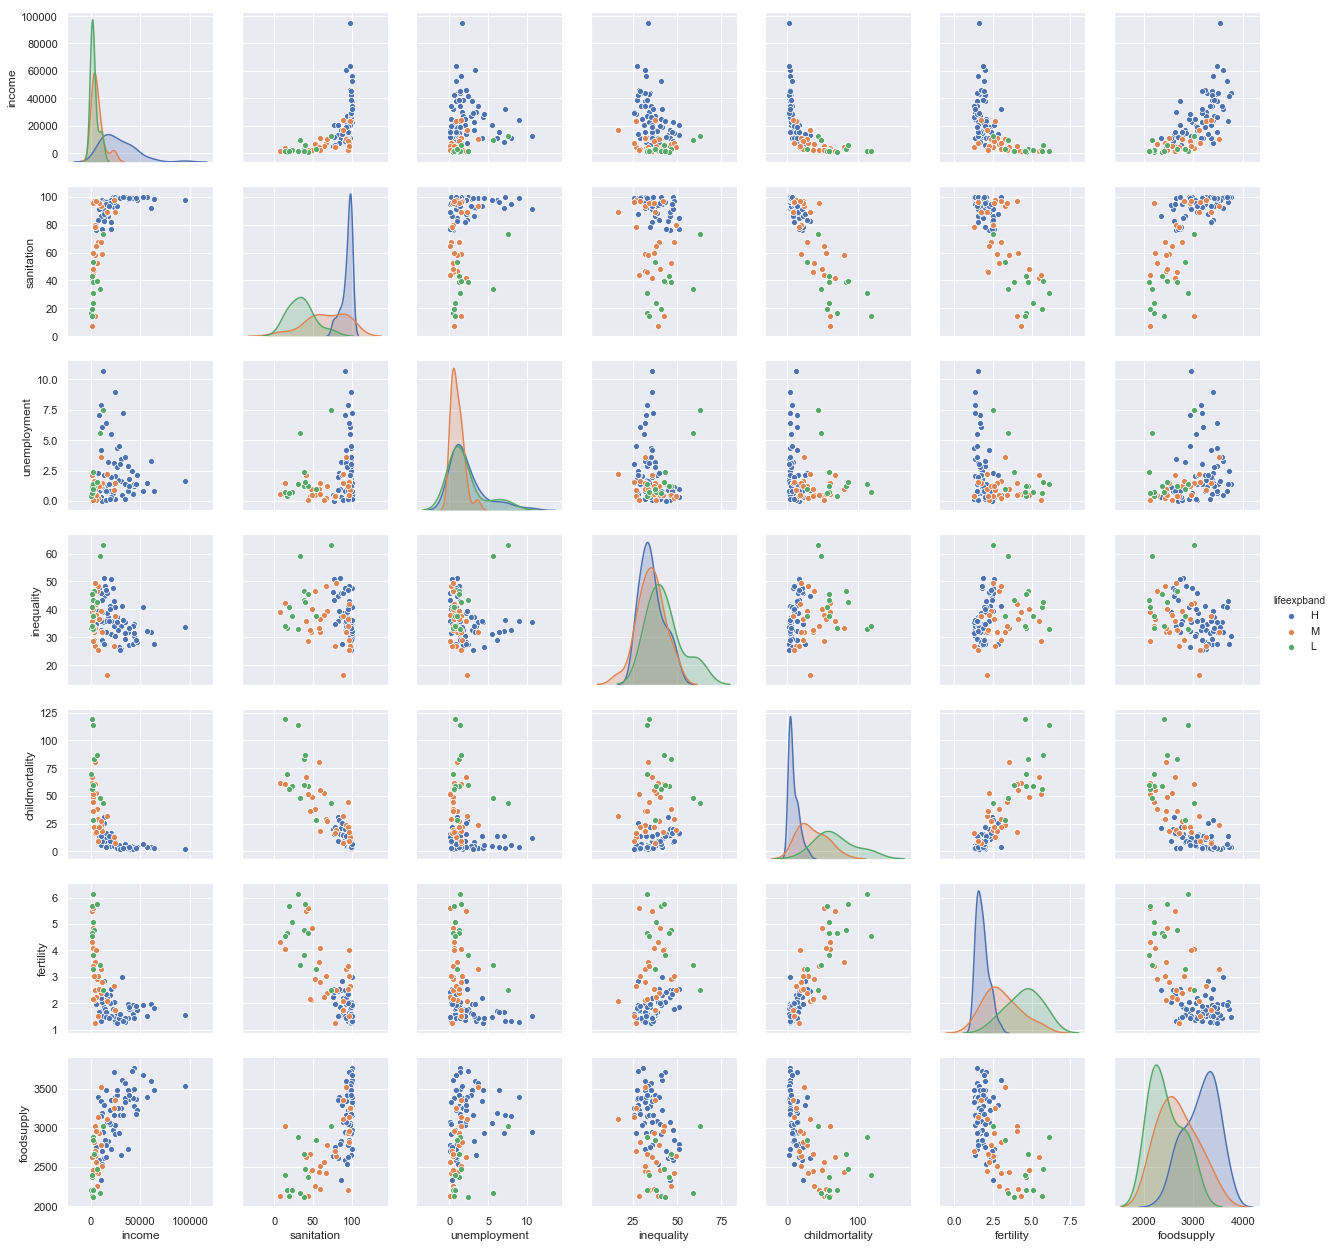

In [10]:
# Select a subset of the features
subset = world_data[['income', 'sanitation', 'unemployment', 'inequality', 
       'childmortality', 'fertility', 'foodsupply', 'lifeexpband']]

# This plot can't cope will nulls, so remove them
subset = subset.dropna()

# Plot
sns.pairplot(subset, hue='lifeexpband')

<hr/>

## Activity >>
Do some further bivariate investigations on the world data set.

<hr/>